**Disclaimer**: The dataset may have some minor modifications for educational purposes.

**Dataset Overview**: The CIFAR-10 dataset consists of 60,000 32x32 color images across 10 classes, with 6,000 images per class. It includes 50,000 training images and 10,000 test images, divided into five training batches and one test batch, each containing 10,000 images.

The dataset can be found here.


#### You are asked to train a model with following steps:
1. Download, extract, and load the CIFAR-10 image dataset using `torchvision`.
2. Display random batches of images in a grid using `torchvision.utils.make_grid`.
3. Create a convolutional neural network (CNN) with `nn.Conv2d` and `nn.MaxPool2d` layers.
4. Train the CNN and visualize the losses and errors.
5. Understand overfitting and explore strategies to avoid it.
6. Generate predictions on individual images from the test set.
7. Save and load the model for future use.

#### Complete Homework with following steps:
1. Name your final homework script as **Image_Classification_using_CNN_in_PyTorch**.
2. Create a repository named **CIFAR-10-CNN** on your GitHub account and push your case study script to this repository.
3. Fork other users’ repositories and make pull requests (at least one; making three pull requests is desirable).
- **Note**: Your pull requests should either resolve issues or add new features.

**Disclaimer**: Dataset tədris məqsədləri üçün bəzi kiçik dəyişikliklərə malik ola bilər.

**Dataset Haqqında**: CIFAR-10 dataset-i 10 sinifdə 32x32 ölçüsündə rəngli 60000 şəkildən ibarətdir. Hər sinifdə 6000 şəkil var. Dataset 50000 təlim və 10000 test şəkilinə bölünür və beş təlim batch-i və bir test batch-i şəklində təşkil olunub, hər batch 10000 şəkildən ibarətdir.

Dataset-i burada tapa bilərsiniz.

#### Modeli təlim etmək üçün aşağıdakı addımları yerinə yetirin:
1. `torchvision` istifadə edərək CIFAR-10 şəkil datasetini yükləyin, çıxarın və yükləyin.
2. `torchvision.utils.make_grid` istifadə edərək təsadüfi batch-ləri grid şəklində göstərin.
3. `nn.Conv2d` və `nn.MaxPool2d` qatlarını istifadə edərək bir konvolyusion neyron şəbəkəsi (CNN) yaradın.
4. CNN-i təlimləndirin və itkiləri və xətaları vizuallaşdırın.
5. Overfitting-i anlayın və bunun qarşısını almaq üçün strategiyaları araşdırın.
6. Test datasetindən tək şəkillər üçün proqnozlar yaradın.
7. Modeli gələcəkdə istifadə üçün yadda saxlayın və yükləyin.

#### Tapşırığı tamamlayın:
1. Son tapşırıq skriptinizin adını **Image_Classification_using_CNN_in_PyTorch** olaraq qeyd edin.
2. Github hesabınızda **CIFAR-10-CNN** adlı bir repository yaradın və Case Study skriptinizi bu repository-ə yükləyin.
3. Digər istifadəçilərin repository-lərini fork edin və pull request-lər göndərin (ən azı bir, üç pull request etmək məsləhətdir).
- **Qeyd**: Sizin pull request-ləriniz ya problemləri həll etməli, ya da yeni xüsusiyyətlər əlavə etməlidir.

In [1]:
#import all packages
import numpy as np 
import random
import matplotlib as mpl
import matplotlib.pyplot as plt 
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler

import torchvision
import torchvision.datasets
import torchvision.utils as utils
import torchvision.transforms as transforms
import torchvision.datasets as datasets

#ignore all warnings
import warnings
warnings.filterwarnings (action= 'ignore')

#set some parameters
mpl.rcParams['figure.figsize'] = [16,9]

In [2]:
#pip install torch

In [3]:
#pip install torchvision

In [4]:
torch.cuda.is_available()

False

In [5]:
import torch

# check if CUDA is available

train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available. Training on CPU...')
else:
    print('CUDA is available. Training on GPU...')

CUDA is not available. Training on CPU...


### CIFAR10 data yuklenir ve Normalize olunur

In [6]:
import torchvision.datasets as datasets
import torchvision.transforms as transforms

num_workers = 0 
batch_size = 20
valid_size = 0.2

transform=transforms.Compose([transforms. ToTensor(), transforms. Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_data = datasets.CIFAR10(root='data', train=True, transform=transform, download=True)
test_data = datasets.CIFAR10(root='data', train=False, transform=transform, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [7]:
print(train_data.classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


### SubsetRandomSampler: train data ucun train ve valid sampler yaradilir

In [8]:
import numpy as np 
from torch.utils.data.sampler import SubsetRandomSampler

# obtain training indices that will be used for validation
num_train = len(train_data)  # Train data setindəki ümumi nümunə sayını əldə edir
indicies = list(range(num_train))  # Nümunələr üçün indekslərin siyahısını yaradır
np.random.shuffle(indicies)  # Bu indeksləri təsadüfi qarışdırır
# Təlim datasının 20%-ni doğrulama üçün bölmək üçün split nöqtəsini müəyyən edir
split = int(np.floor(0.2 * num_train))
# Qarışdırılmış indeksləri təlim və doğrulama üçün iki hissəyə ayırır
train_idx, valid_idx = indicies[split:], indicies[:split]

# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)  # Təlim üçün təsadüfi indeksləri seçən sampler yaradır
valid_sampler = SubsetRandomSampler(valid_idx)  # Doğrulama üçün təsadüfi indeksləri seçən sampler yaradır

### Prepare train vs valid vs test data

In [9]:
from torch.utils.data import DataLoader

# Verilənlər yükləyicilərini hazırlayır (dataset və sampler ilə birləşdirir)

# Əsas təlim dəsti üçün məlumat yükləyici yaradır, hər batch-də 20 şəkil götürür və train_sampler istifadə edir
train_loader = torch.utils.data.DataLoader(train_data, batch_size=20, sampler=train_sampler) 
# Eyni batch ölçüsü ilə əsas təlim dəstindən validation üçün məlumat yükləyici yaradır, valid_sampler istifadə edir
valid_loader = torch.utils.data.DataLoader(train_data, batch_size=20, sampler=valid_sampler) 
# Test dəsti üçün məlumat yükləyici yaradır, sampler istifadə etmir, 
#                                                         çünki test mərhələsində bütün məlumatları bir-bir oxuyur
test_loader = torch.utils.data.DataLoader(test_data, batch_size=20)

# CIFAR-10 datasetindəki şəkillərin aid olduğu sinifləri müəyyən edir
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

###  train_loader-dən bir batch şəkillər Plot olunur

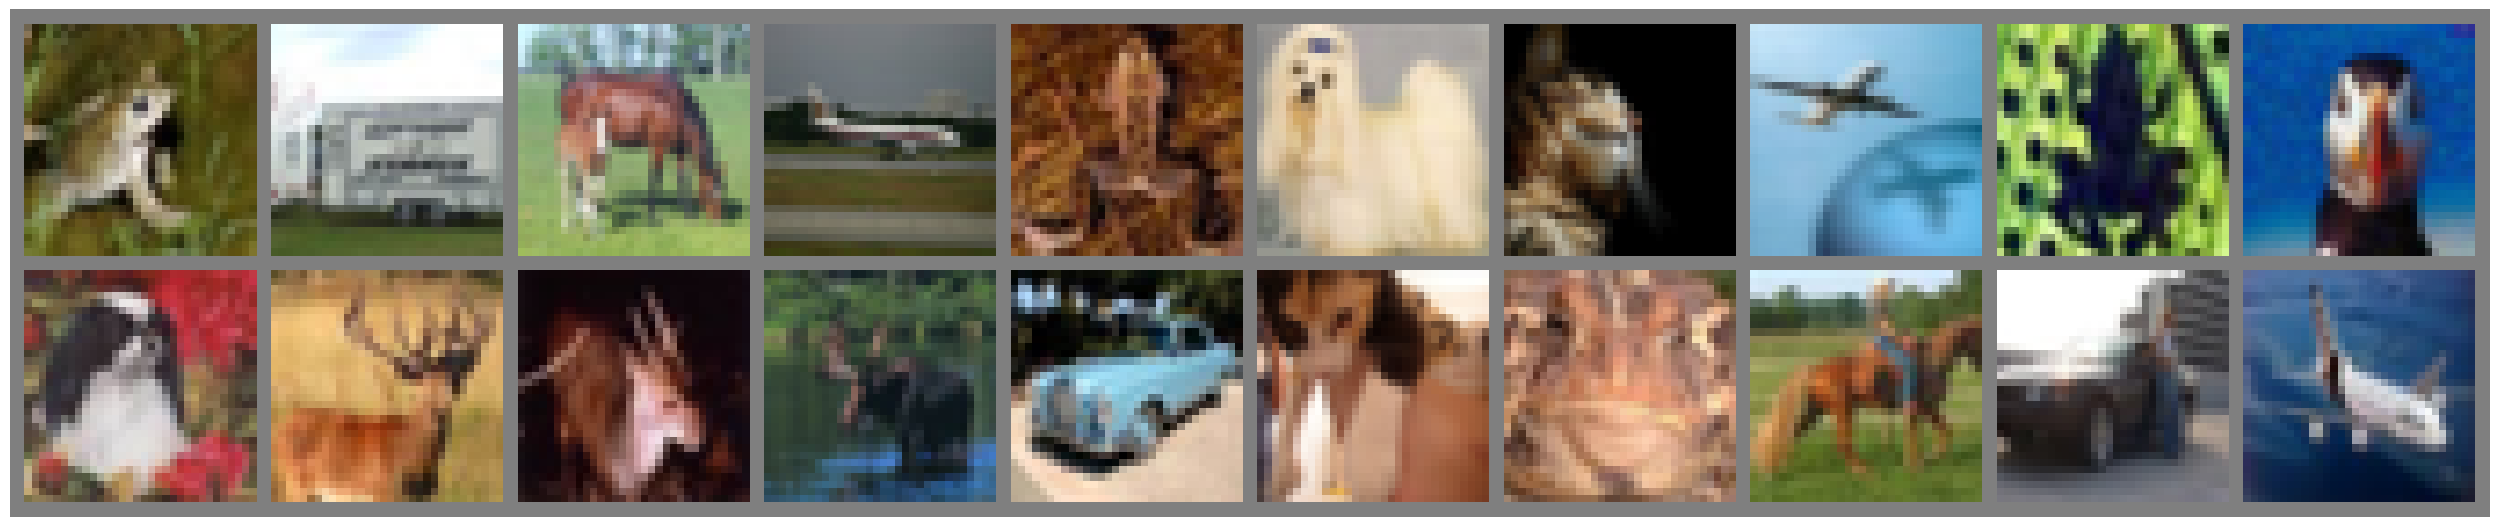

In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# Şəkilləri göstərmək üçün funksiya təyin edir
def imshow(image):
    
    # Əgər giriş `torch.Tensor` tipindədirsə, numpy array-ə çevirir və kanalları (1,2,0) şəklində düzəldir
    if isinstance(image, torch.Tensor):
        image = image.numpy().transpose((1, 2, 0))
        
    # Əgər giriş `torch.Tensor` deyilsə, onu numpy array-ə çevirir və kanalları düzəldir
    else:
        image = np.array(image).transpose((1, 2, 0))
    
    # Orta və standart sapma dəyərlərini RGB kanallarına görə müəyyən edir
    mean = np.array([0.5, 0.5, 0.5])
    std = np.array([0.5, 0.5, 0.5])
    # Şəkili orijinal formata qaytarmaq üçün normalizasiya dəyərlərini geri alır (inverse normalization)
    image = std * image + mean
    # Dəyərləri 0 ilə 1 arasında sıxır ki, şəkil düzgün göstərilsin
    image = np.clip(image, 0, 1)

    # Şəkili göstərmək üçün matplotlib-də qrafik obyekti yaradır
    fig, ax = plt.subplots(1, 1, figsize=(32, 32))
    # Şəkili matplotlib ilə göstərir
    plt.imshow(image)
    # Oxları gizlədir, beləliklə şəkil tam görünür
    ax.axis('off')

# `train_loader`-dən bir batch (təlim üçün bir sıra şəkillər) götürür
images, _ = next(iter(train_loader))
# 10 şəkil sırasını grid şəklində təşkil edir
out = torchvision.utils.make_grid(images, nrow=10)
# `imshow` funksiyasını çağıraraq şəkilləri göstərir
imshow(out)


### Hər dövr üçün alınan 'images' tensorunun ölçülərini çap edi

In [11]:
# train_loader-dən görüntü və etiketləri əldə etmək üçün dövr yaradırıq
for images, labels in train_loader:
    # Hər dövr üçün alınan 'images' tensorunun ölçülərini çap edirik
    print(images.shape)  
    # İlk dövrün sonunda dövrü dayandırırıq, çünki yalnız bir partiya (batch) göstərmək istəyirik
    break  

torch.Size([20, 3, 32, 32])


In [12]:
train_data[0][0].shape

torch.Size([3, 32, 32])

### Creat Model

In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Formula
# s = (Si - filter_size + 2*padding) / stride + 1

class NeuralNetwork(nn.Module):
    def __init__(self):  # __init__ metodu düzgün adlandırılır
        super(NeuralNetwork, self).__init__()  # super() funksiyası düzgün çağırılır

        # 1-ci konvolyusional qat
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=12, kernel_size=3, padding=1, stride=1)  
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)  # MaxPooling qat

        # 2-ci konvolyusional qat
        self.conv2 = nn.Conv2d(in_channels=12, out_channels=24, kernel_size=3, padding=1, stride=1)

        # Tam bağlantılı qatlar (Fully Connected Layers)
        self.fc1 = nn.Linear(24 * 16 * 16, 256)  # İlk tam bağlantılı qat
        self.fc2 = nn.Linear(256, 256)  # İkinci tam bağlantılı qat
        self.out = nn.Linear(256, 10)  # Çıxış qatında 10 sinif

    def forward(self, x):
        x = F.relu(self.conv1(x))  # 1-ci konvolyusional qatın aktivasiya funksiyası
        x = self.pool(x)  # MaxPooling

        x = F.relu(self.conv2(x))  # 2-ci konvolyusional qatın aktivasiya funksiyası
        x = x.view(x.size(0), -1)  # Tensorun ölçüsünü düzəldir (flatten)

        x = F.relu(self.fc1(x))  # İlk tam bağlantılı qatın aktivasiya funksiyası
        x = F.relu(self.fc2(x))  # İkinci tam bağlantılı qatın aktivasiya funksiyası

        out = self.out(x)  # Çıxış
        return out  # Nəticə qaytarılır

# Modelin yaradılması
model = NeuralNetwork()

In [14]:
# conv1
# in 3, 32, 32

(32 - 3 + 2*1) / 1 + 1

# out 12 , 32, 32

32.0

In [15]:
# pool
# in 12 , 32, 32

(32 - 2) / 2 + 1

# out 12, 16, 16

16.0

In [16]:
# conv2
# in 12, 16, 16

(16 - 3 + 2*1) / 1 + 1

# out 24, 16, 16

16.0

### Count Paramteres in Model

In [17]:
# Modeldəki parametrlərin sayını hesablayan funksiyanı təyin edirik
def count_parameters(model):
    """Count the number of parameters in a model.""" 
    # Ümumi parametr sayını saxlamaq üçün `total_params` dəyişənini 0-a bərabər edirik
    total_params = 0  
    # Modelin bütün parametrlərini tək-tək gəzirik
    for param in model.parameters():  
        # Hər parametrin element sayını `total_params`-a əlavə edirik
        total_params += param.numel()  
    # Ümumi parametr sayını geri qaytarırıq
    return total_params

# ConvNet sinfinə əsasən bir model nümunəsi yaradırıq
conv_net = model 
# `count_parameters` funksiyasını çağıraraq `conv_net` modelindəki parametr sayını hesablayırıq
num_params = count_parameters(conv_net)  
# Ümumi parametr sayını ekranda çap edirik
print(num_params)  


1644434


In [18]:
# !pip install torchsummary

In [19]:
from torchsummary import summary

summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 12, 32, 32]             336
         MaxPool2d-2           [-1, 12, 16, 16]               0
            Conv2d-3           [-1, 24, 16, 16]           2,616
            Linear-4                  [-1, 256]       1,573,120
            Linear-5                  [-1, 256]          65,792
            Linear-6                   [-1, 10]           2,570
Total params: 1,644,434
Trainable params: 1,644,434
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.17
Params size (MB): 6.27
Estimated Total Size (MB): 6.45
----------------------------------------------------------------


In [20]:
#move tensor to GPU if CUDA is available

# Cihazın GPU-dan istifadə edə biləcəyini yoxlayır
if train_on_gpu:  
    # Modeli GPU-ya göndərir ki, hesablama əməliyyatları GPU üzərində aparılsın.
    model.cuda()

### CrossEntropyLoss vs Optimzation

In [21]:
import torch.optim as optim
import torch.nn as nn

# Itki funksiyasını müəyyən edir
# Burada `nn.CrossEntropyLoss()` çox sinifli təsnifat üçün istifadə olunan itki funksiyasıdır.
# Modelin proqnozlarını və həqiqi sinif etiketlərini müqayisə edərək itki dəyərini hesablayır.
criterion = nn.CrossEntropyLoss()  

# Optimizeri müəyyən edir
# `optim.SGD`, Stochastic Gradient Descent (SGD) optimizatorudur.
# `model.parameters()` modeli öyrədərkən yenilənəcək model parametrlərini təmin edir.
# `lr=0.01` isə öyrənmə sürətini (`learning rate`) təyin edir; yəni hər iterasiyada parametrlərin nə qədər 
#                                                                                     dəyişəcəyini müəyyən edir.
optimizer = optim.SGD(model.parameters(), lr=0.01)

### Train vs Validate stage

In [22]:
from re import L  # 'L' adlı bir dəyişəni `re` modulundan idxal edir (görünür, burada lazım deyil)
n_epochs = 6  # Təlim üçün epoch sayını təyin edir
num_classes = 10  # Modelin çıxışında neçə sinif olacağını göstərir (məsələn, 10 siniflik bir təsnifat problemi)
learning_rate = 0.01  # Optimallaşdırma üçün təlim sürətini təyin edir

# Vizualizasiya üçün zərər dəyərlərini saxlamaq üçün siyahı
train_losslist = []  # Təlim zərər dəyərlərini izləmək üçün boş bir siyahı yaradır
valid_loss_min = np.Inf  # Əvvəlki ən yaxşı (ən aşağı) validation zərər dəyərini sonsuz olaraq təyin edir 
#                                                                                                 (ilk müqayisə üçün)

for epoch in range(1, n_epochs+1):  # Epochlar arasında dövr başlatır
    # Təlim və validasiya zərər dəyərlərini izləyin
    train_loss = 0.0  # Təlim zərərini toplamaq üçün sıfırdan başlayır
    valid_loss = 0.0  # Validation zərərini toplamaq üçün sıfırdan başlayır

    # train the model
    # Modeli təlim rejiminə keçir ki, bu da BatchNorm və Dropout kimi qatların düzgün işləməsi üçün vacibdir
    model.train()  
    for images, labels in train_loader:  # Təlim dəsti üzərində batch-lərlə dövr edir
        
        if train_on_gpu:  # Əgər GPU-da təlim varsa
            images, licenseabels = images.cuda(), labels.cuda()  # Şəkil və etiketləri GPU-ya göndərir
        
        # Bütün optimallaşdırılmış dəyişənlərin gradientlərini təmizlə
        optimizer.zero_grad()  # Əvvəlki batch-in gradientlərini sıfırlayır ki, yeni gradientlər yığılsın

        # Forward keçid: Proqnoz çıxışlarını hesablamaq üçün girişləri modelə daxil edir
        output = model(images)  # Modeldən çıxışı alır
        # Batch üçün zərər dəyərini hesabla
        # Modelin çıxışı ilə faktiki etiketlər arasındakı zərər dəyərini hesablamaq üçün kriteriyanı istifadə edir
        loss = criterion(output, labels)  

        # Backward keçid: Zərər dəyərinin gradientini model parametrlərinə görə hesabla
        loss.backward()  # Zərər dəyərinin gradientini hesablayır
        # Parametrləri yenilə
        optimizer.step()  # Optimallaşdırıcı gradientlər əsasında modelin parametrlərini yeniləyir
        
        # Batch zərərini toplam təlim zərərinə əlavə edir, batch ölçüsü ilə vurulur
        train_loss += loss.item() * images.size(0)
        
    # validate the model
    model.eval()  # Modeli təlim rejimindən qiymətləndirmə rejiminə keçirir
    for images, labels in valid_loader:  # Validasiya dəsti üzərində batch-lərlə dövr edir
        
        # move tensors to GPU if CUDA is available
        if train_on_gpu:  # Əgər GPU-da təlim varsa
            images, labels = images.cuda(), labels.cuda()  # Şəkil və etiketləri GPU-ya göndərir

        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(images)  # Modeldən çıxışı alır
        # calculate the batch loss
        # Modelin çıxışı ilə faktiki etiketlər arasındakı zərər dəyərini hesablamaq üçün kriteriyanı istifadə edir
        loss = criterion(output, labels)  
        # update average validation loss
        # Batch zərərini toplam validasiya zərərinə əlavə edir, batch ölçüsü ilə vurulur
        valid_loss += loss.item() * images.size(0)
        
    # calculate average losses
    # Orta təlim zərərini hesablamaq üçün toplam təlim zərərini təlim nümunələrinin sayına bölür
    train_loss = train_loss / len(train_loader.dataset)
    # Orta validasiya zərərini hesablamaq üçün toplam validasiya zərərini validasiya nümunələrinin sayına bölür
    valid_loss = valid_loss / len(valid_loader.dataset)
    # Orta validasiya zərərini saxlamaq üçün siyahıya əlavə edir
    train_losslist.append(valid_loss)  

    # print training/validation statistics
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(epoch, train_loss, valid_loss))

    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:  # Əgər yeni validasiya zərəri əvvəlki minimumdan azdırsa
        print('Validation loss decreased ({:.6f} --> {:.6f}). Saving model ...'.format(valid_loss_min, valid_loss))
        torch.save(model.state_dict(), 'model_cifar.pt')  # Modelin vəziyyətini fayla saxlayır
        valid_loss_min = valid_loss  # Ən aşağı validasiya zərər dəyərini yeniləyir

Epoch: 1 	Training Loss: 1.561822 	Validation Loss: 0.347013
Validation loss decreased (inf --> 0.347013). Saving model ...
Epoch: 2 	Training Loss: 1.240213 	Validation Loss: 0.284384
Validation loss decreased (0.347013 --> 0.284384). Saving model ...
Epoch: 3 	Training Loss: 1.080948 	Validation Loss: 0.258856
Validation loss decreased (0.284384 --> 0.258856). Saving model ...
Epoch: 4 	Training Loss: 0.976745 	Validation Loss: 0.244100
Validation loss decreased (0.258856 --> 0.244100). Saving model ...
Epoch: 5 	Training Loss: 0.893300 	Validation Loss: 0.232004
Validation loss decreased (0.244100 --> 0.232004). Saving model ...
Epoch: 6 	Training Loss: 0.820518 	Validation Loss: 0.223151
Validation loss decreased (0.232004 --> 0.223151). Saving model ...


In [23]:
valid_loss_min

0.2231509107232094

### train_loss Plot

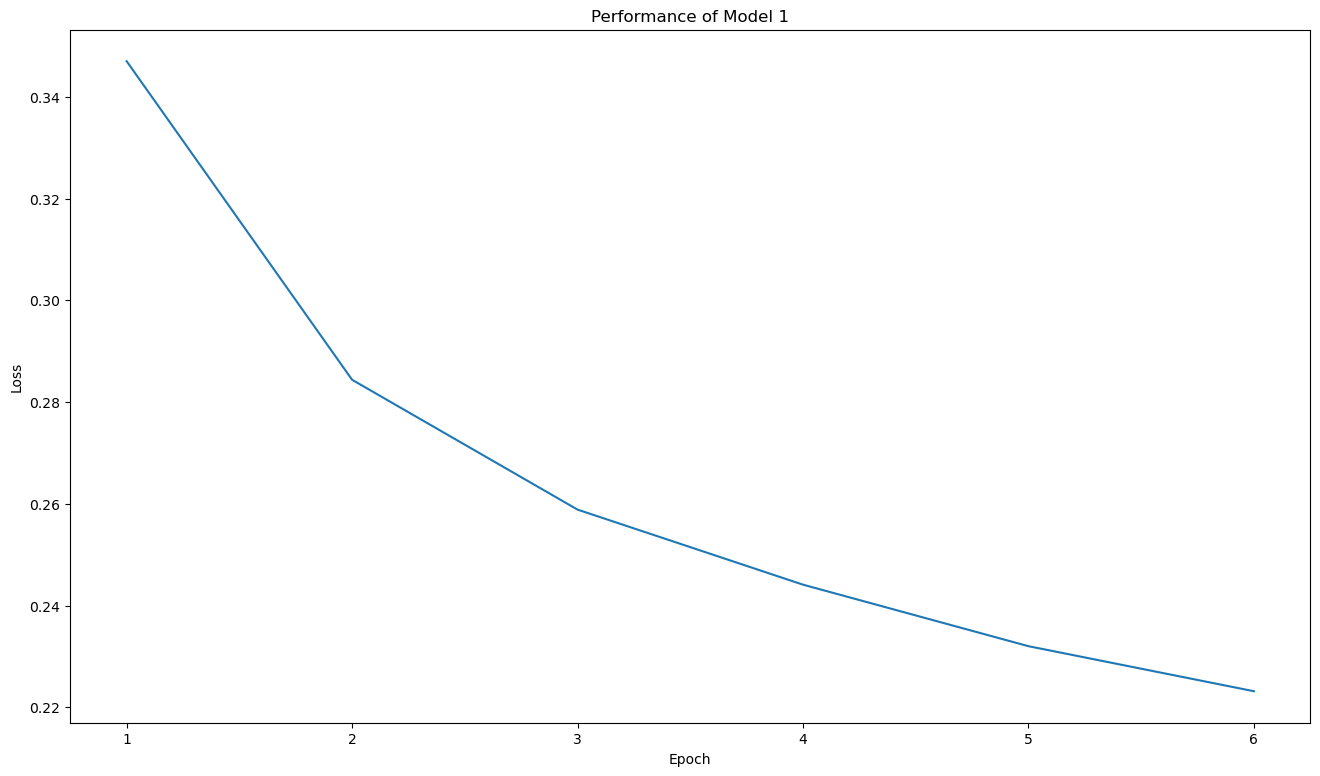

In [24]:
plt.plot(range(1,n_epochs+1), train_losslist) 
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Performance of Model 1')
plt.show()

### Train vs Evolution stage

In [25]:
best_acc = 0.0  # Ən yaxşı dəqiqlik dəyərini saxlamaq üçün dəyişən

for epoch in range(n_epochs):  # Epoch-lar üzrə dövr edir
    
    model.train()  # Modeli təlim rejiminə keçirir
    train_accuracy = 0.0  # Təlim dəqiqliyini sıfırlayır
    train_loss = 0.0  # Təlim zərər dəyərini sıfırlayır
    for i, (images, labels) in enumerate(train_loader):  # Təlim məlumatları üzərində batch-lərlə dövr edir
        
        optimizer.zero_grad()  # Gradientləri sıfırlayır
        
        output = model(images)  # Modeldən çıxışı alır
        loss = criterion(output, labels)  # Zərər dəyərini hesablayır
        
        loss.backward()  # Zərər funksiyasının gradientlərini hesablayır
        optimizer.step()  # Parametrləri yeniləyir
        
        train_loss += loss.cpu().data * images.size(0)  # Təlim zərərinə cari batch zərərini əlavə edir
        _, prediction = torch.max(output.data, 1)  # Çıxışdan maksimum dəyəri alır və proqnozları əldə edir
        train_accuracy += int(torch.sum(prediction == labels.data))  # Proqnozların düzgünlüyünü toplama əlavə edir

    train_accuracy = train_accuracy / len(train_loader.dataset)  # Orta təlim dəqiqliyini hesablayır
    train_loss = train_loss / len(train_loader.dataset)  # Orta təlim zərərini hesablayır

    
    model.eval()  # Modeli qiymətləndirmə rejiminə keçirir
    test_accuracy = 0.0  # Test dəqiqliyini sıfırlayır
    for i, (images, labels) in enumerate(test_loader):  # Test məlumatları üzərində batch-lərlə dövr edir
        
        output = model(images)  # Modeldən çıxışı alır
        
        _, prediction = torch.max(output.data, 1)  # Çıxışdan maksimum dəyəri alır və proqnozları əldə edir
        test_accuracy += int(torch.sum(prediction == labels.data))  # Proqnozların düzgünlüyünü toplama əlavə edir

    test_accuracy = test_accuracy / len(test_loader.dataset)  # Orta test dəqiqliyini hesablayır
    print(f'''Epoch: {epoch+1}, Train_loss: {train_loss:.4f}, Train_accuracy: {train_accuracy:.2f}, 
                                                Test_accuracy: {test_accuracy:.2f}''')  # Epoch nəticələrini çap edir

    if test_accuracy > best_acc:  # Əgər test dəqiqliyi əvvəlki ən yaxşı dəqiqlikdən yüksəkdirsə
        torch.save(model.state_dict(), 'best_performing.model')  # Modelin vəziyyətini saxlayır
        best_acc = test_accuracy  # Ən yaxşı dəqiqliyi yeniləyir

Epoch: 1, Train_loss: 0.7531, Train_accuracy: 0.53, 
                                                Test_accuracy: 0.62
Epoch: 2, Train_loss: 0.6833, Train_accuracy: 0.56, 
                                                Test_accuracy: 0.63
Epoch: 3, Train_loss: 0.6115, Train_accuracy: 0.59, 
                                                Test_accuracy: 0.64
Epoch: 4, Train_loss: 0.5384, Train_accuracy: 0.61, 
                                                Test_accuracy: 0.66
Epoch: 5, Train_loss: 0.4590, Train_accuracy: 0.64, 
                                                Test_accuracy: 0.65
Epoch: 6, Train_loss: 0.3809, Train_accuracy: 0.67, 
                                                Test_accuracy: 0.64


In [26]:
best_acc

0.657

### Pictures Plot which Model can not learning

In [27]:
import random  # Təsadüfi nümunə götürmək üçün random modulunu idxal edirik
import torch  # Model əməliyyatları və tensorların idarə olunması üçün PyTorch-u idxal edirik
import matplotlib.pyplot as plt  # Vizualizasiya üçün Matplotlib-i idxal edirik
 # Şəkilləri şəbəkə formatında düzəltmək üçün torchvision-un utils modulunu idxal edirik
import torchvision.utils as utils 

def plot_predictions():
    # Test loader-dən təsadüfi bir batch (dəstə) götürürük
    sample = random.sample(list(test_loader), 1)  # Test datadan təsadüfi bir batch seçirik
    images = sample[0][0]  # Nümunədən şəkilləri götürürük
    labels = sample[0][1]  # Nümunədən etiketləri (label) götürürük
    
    # Modelin proqnozlarını alırıq
    # Şəkilləri modeldən keçirərək proqnozları əldə edirik və onları computation graph-dan ayırırıq
    output = model(images).data
    # Hər bir şəkil üçün proqnoz edilən sinif indekslərini torch.max ilə alırıq
    _, predictions = torch.max(output.data, 1)  

    # Vizualizasiya
    plt.figure(figsize=(15, 15))  # Şəkilləri göstərmək üçün təyin edilmiş ölçüdə yeni bir şəkil (figure) yaradırıq
     # Şəkilləri şəbəkə (grid) formatında düzəldirik və göstəriş üçün ölçüləri tənzimləyirik
    images_grid = utils.make_grid(images, nrow=4).permute(2, 1, 0) 
    plt.imshow(images_grid)  # Şəbəkə şəklində düzəldilmiş şəkilləri göstəririk
    plt.axis('off')  # Təmiz görüntü üçün oxları və etiketləri (axis) söndürürük

    # Əsl etiketləri və proqnozları çap edirik
    print(f'True Labels: {labels}')  # Şəkillərin əsl etiketlərini çap edirik
    print(f'Predictions: {predictions}')  # Modelin verdiyi proqnozları çap edirik

    plt.subplots_adjust(wspace=0.5, hspace=0.5)  # Alt şəkillər arasındakı boşluğu tənzimləyirik (lazım olduqda)
    plt.show()  # Şəkili (plot) ekranda göstəririk

In [28]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


True Labels: tensor([9, 3, 2, 7, 7, 8, 1, 0, 3, 4, 6, 7, 5, 2, 0, 1, 5, 5, 1, 4])
Predictions: tensor([9, 1, 6, 7, 4, 1, 1, 0, 4, 4, 3, 7, 8, 2, 0, 1, 5, 5, 1, 3])


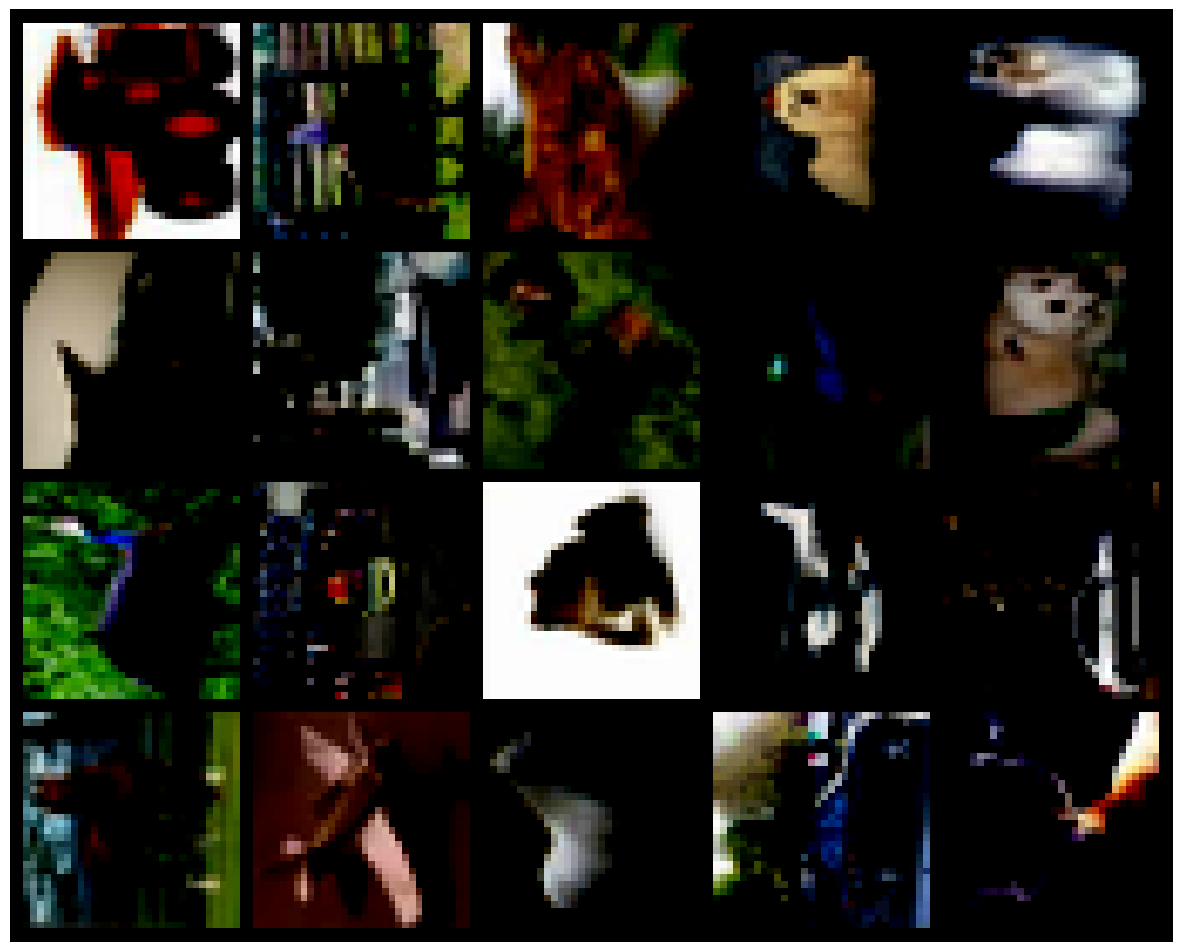

In [29]:
plot_predictions()

### Pictures Plot which Model can not learning

In [30]:
def image_plot(image, label):
    # Şəkillərin sinif adlarını saxlayan bir siyahı yaradırıq
    labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    # Yeni bir şəkil pəncərəsi (fig) və oxlar (ax) yaradırıq və ölçüsünü (1x1) təyin edirik
    fig, ax = plt.subplots(figsize=(1, 1))
    # Şəkili `numpy` formatına çeviririk və kanal sırasını (C, H, W -> H, W, C) dəyişirik
    image = image.permute(1, 2, 0).numpy()
    # Şəkili pəncərəyə göstərmək üçün `ax.imshow` funksiyasını istifadə edirik
    ax.imshow(image)
    # Şəkil üçün oxları gizlədirik
    ax.axis('off')
    # Şəkilin başlığını onun etiketinə görə təyin edirik
    plt.title(labels[label])
    # Şəkili ekranda göstəririk
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


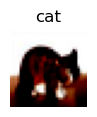

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


True: cat Predicted: horse


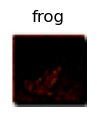

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


True: frog Predicted: frog


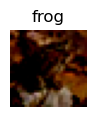

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


True: frog Predicted: frog


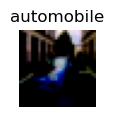

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


True: automobile Predicted: automobile


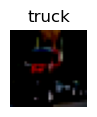

True: truck Predicted: truck


In [31]:
from random import randint

# Şəkillərin sinif adlarını saxlayan bir siyahı yaradırıq
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# 5 dəfə təkrarlanacaq bir dövr yaradırıq
for _ in range(5):
    # 1 ilə 10000 arasında təsadüfi bir indeks seçirik
    random_index = randint(1, 10000)

    # Təsadüfi indeksdən şəkil və etiket alırıq
    image = test_data[random_index][0]
    label = test_data[random_index][1]

    # Şəkli və etiketini göstərəcəyimiz funksiyanı çağırırıq
    image_plot(image, label)

    # Modeli qiymətləndirmə rejiminə keçiririk
    model.eval()  
    # Gradientləri hesablamadan irəli ötürmə əməliyyatı üçün
    with torch.no_grad():
        # Şəkli modelə verib təxminləri alırıq
        predictions = model(image.unsqueeze(0))
    
    # Ən yüksək ehtimallı təxminin sinif indeksini alırıq
    _, predicted = torch.max(predictions, 1)

    # Doğru və təxmin edilən sinifləri çap edirik
    print('True:', labels[label], 'Predicted:', labels[predicted])

### Metrics

In [60]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score,\
                                                                                                    confusion_matrix

model.eval() # Modeli qiymətləndirmə rejiminə keçirir
all_labels = [] # Test dəstindəki həqiqi etiketləri saxlamaq üçün boş siyahı
all_predictions = [] # Modelin təxmin etdiyi etiketləri saxlamaq üçün boş siyahı

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images) # Test məlumatlarını modeldən keçirir
        _, predicted = torch.max(outputs, 1) # Hər bir nümunə üçün ehtimalı ən yüksək olan sinifi seçir
        all_labels.extend(labels.cpu().numpy()) # Həqiqi etiketləri siyahıya əlavə edir
        all_predictions.extend(predicted.cpu().numpy()) # Təxminləri siyahıya əlavə edir

# Metrikləri hesablamaq
accuracy = accuracy_score(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions, average='weighted')
recall = recall_score(all_labels, all_predictions, average='weighted')
precision = precision_score(all_labels, all_predictions, average='weighted')
conf_matrix = confusion_matrix(all_labels, all_predictions)

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'F1 Score: {f1:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Precision: {precision:.2f}')
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(all_labels, all_predictions))

Accuracy: 63.65%
F1 Score: 0.64
Recall: 0.64
Precision: 0.65
Confusion Matrix:
 [[597  48  67  25  30  20  13  18 123  59]
 [ 12 822   7   9   4   9   6   5  28  98]
 [ 41  16 417  81 169 142  65  37  19  13]
 [ 13  24  48 368  80 329  60  35  15  28]
 [ 17  10  47  56 655  93  45  51  17   9]
 [  6   7  29 141  56 693  14  38   9   7]
 [  6  19  18  71  93  83 684  11   7   8]
 [ 11  14  18  44  90 132   5 657   6  23]
 [ 44  71  13  18  11  17   5   3 787  31]
 [ 19 167   5  20   8  28   2  19  47 685]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.60      0.68      1000
           1       0.69      0.82      0.75      1000
           2       0.62      0.42      0.50      1000
           3       0.44      0.37      0.40      1000
           4       0.55      0.66      0.60      1000
           5       0.45      0.69      0.54      1000
           6       0.76      0.68      0.72      1000
           7       0.75      0.

### Forecast

In [89]:
from PIL import Image
import torchvision.transforms as transforms
import torch

# FashionMNIST sinif adları
class_names = train_data.classes

# Şəkli yükləyin və modelin gözlədiyi ölçüyə və formata çevirin
image_path = r"C:\Users\dell\Desktop\Python\week11\download(1).png"  # Yeni şəkilinizin fayl yolu
image = Image.open(image_path).convert("L")  # Gri tonlara çevir
transform = transforms.Compose([
    transforms.Resize((32, 32)),  # Modelin gözlədiyi ölçüyə çevirir
    transforms.ToTensor(),        # Tensora çevirir
    transforms.Normalize((0.5,), (0.5,))  # Eyni normalizasiya tətbiq edir
])


# Şəkli tensora çevir və batch boyutunu (1, 1, 28, 28) kimi göstər
image_tensor = transform(image).unsqueeze(0)
image_tensor = image_tensor.repeat(1, 3, 1, 1)  # 3 kanala genişləndir

# Modelin proqnozunu alın
model.eval()
with torch.no_grad():
    output = model(image_tensor)
    _, predicted_class = torch.max(output, 1)

       
# Proqnoz nəticəsini sinif adı ilə göstər
predicted_class_name = class_names[predicted_class.item()]
print(f"Modelin proqnozu: Sinif: {predicted_class.item()} ; Adı: {predicted_class_name}")

Modelin proqnozu: Sinif: 7 ; Adı: horse


### Check Forecast

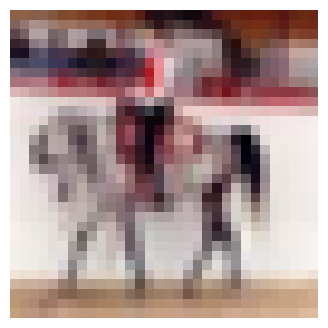

In [90]:
from PIL import Image
import matplotlib.pyplot as plt

# Şəkili açın və göstərmək üçün plt.imshow funksiyasına verin
image_path = r"C:\Users\dell\Desktop\Python\week11\download(1).png"
image = Image.open(image_path)

plt.figure(figsize=(4,4))
plt.imshow(image)
plt.axis("off")  # Oxları gizlətmək üçün
plt.show()